In [1]:
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn import tree
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

feature_names=X.columns
print(feature_names)
print(y.columns)


Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')
Index(['Diagnosis'], dtype='object')


## Decision Tree Classifier max_depth=3

In [2]:
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)
dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_names,
                                    class_names=['M', 'B'], filled = True)

# print(dot)
# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline

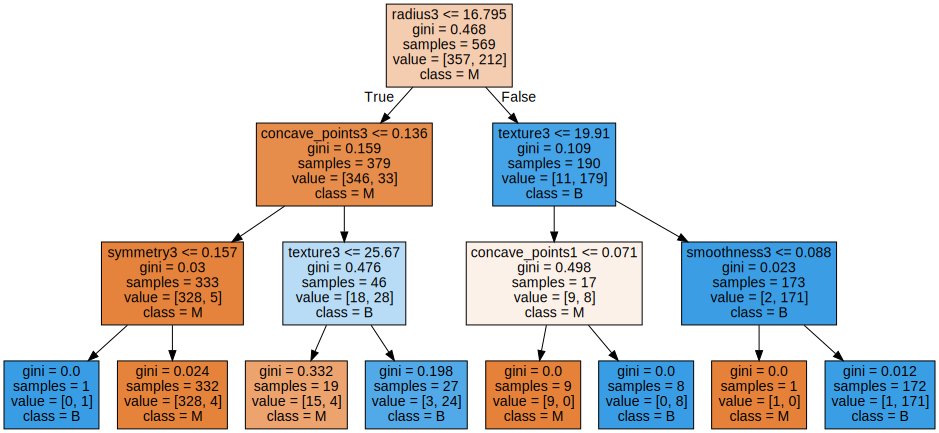

In [3]:
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

## Decision Tree Classifier max_depth=5

In [10]:
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X, y)
dot = tree.export_graphviz(treeclf, out_file=None,feature_names=feature_names,
                                    class_names=['M', 'B'], filled = True)
graph = Source(dot)
print(dot)

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="radius3 <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [357, 212]\nclass = M", fillcolor="#f4ccaf"] ;
1 [label="concave_points3 <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [346, 33]\nclass = M", fillcolor="#e78d4c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="symmetry3 <= 0.157\ngini = 0.03\nsamples = 333\nvalue = [328, 5]\nclass = M", fillcolor="#e5833c"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = B", fillcolor="#399de5"] ;
2 -> 3 ;
4 [label="area2 <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [328, 4]\nclass = M", fillcolor="#e5833b"] ;
2 -> 4 ;
5 [label="smoothness2 <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [317, 2]\nclass = M", fillcolor="#e5823a"] ;
4 -> 5 ;
6 [label="gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = M", fillcolor="#e9965a"] ;
5 -> 6 ;
7 [label="gini = 0.006\nsamples = 31

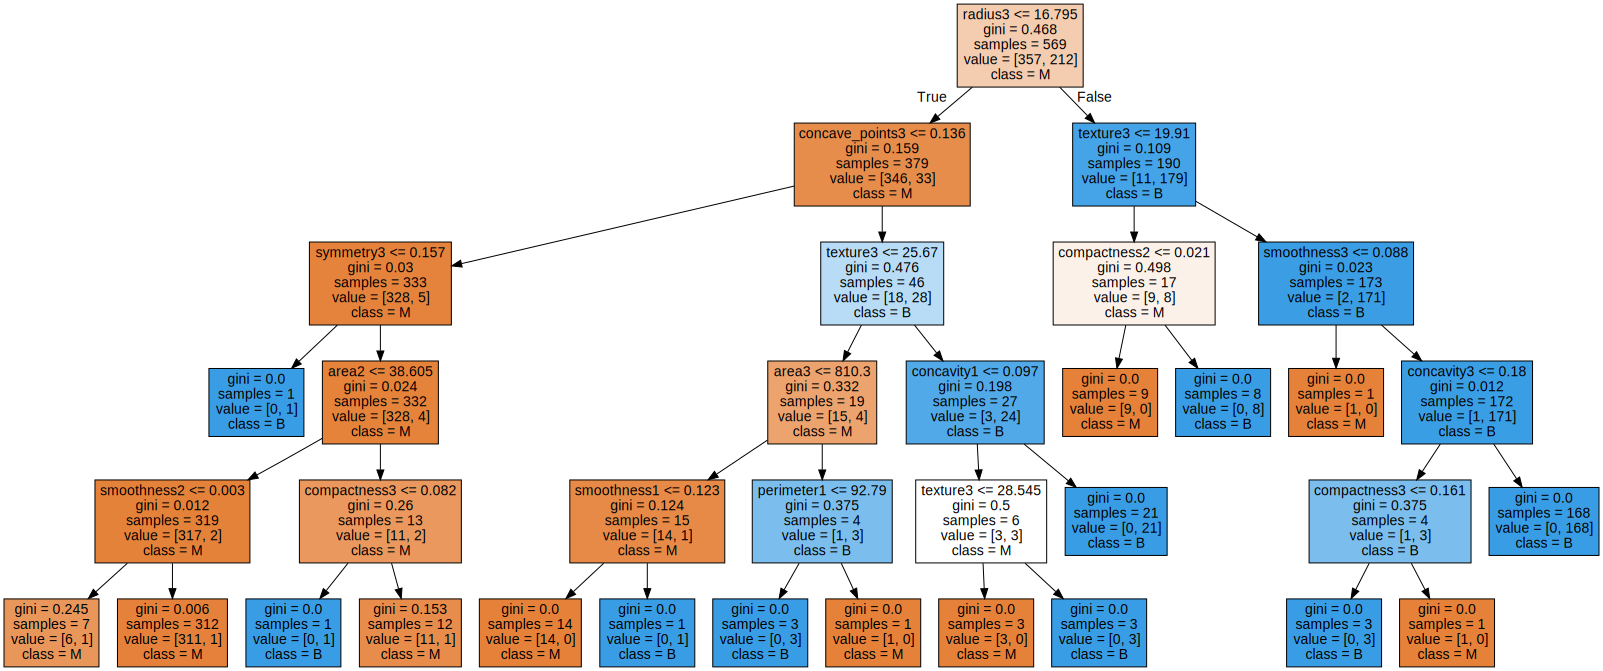

In [11]:
svg = SVG(graph.pipe(format='svg'))
display(svg)

**Decision Tree at Maximum Depth = 3:**

At this depth, the tree's decision-making process is relatively simple, with only a few splits. The key splits involve features like radius, concave points, symmetry, area, and smoothness. The tree focuses on features that seem to have significant predictive power in distinguishing between malignant and benign tumors.

Effect on Bias and Variance:

Bias: With a lower depth, the model has high bias as it might oversimplify the underlying relationships in the data. It may not capture all the nuances of the data.
Variance: Lower variance compared to deeper trees. This is because the model is less complex and less prone to overfitting to the training data.

**Decision Tree at Maximum Depth = 5:**
At this depth, the tree becomes more complex, with more splits and nodes. It incorporates finer details of the dataset, capturing more intricate patterns and relationships.

Effect on Bias and Variance:

Bias: Lower bias compared to the tree with depth 3. The model can capture more complex relationships in the data, reducing bias.
Variance: Higher variance compared to the shallower tree. The model becomes more prone to overfitting as it captures noise in the training data.

## Importance

In [12]:
pd.DataFrame({'feature':feature_names, 'importance':treeclf.feature_importances_})

,feature,importance
0,radius1,0.000000
1,texture1,0.000000
2,perimeter1,0.005759
3,area1,0.000000
4,smoothness1,0.007166
5,compactness1,0.000000
6,concavity1,0.008958
7,concave_points1,0.000000
8,symmetry1,0.000000
9,fractal_dimension1,0.000000


Index(['Diagnosis'], dtype='object')


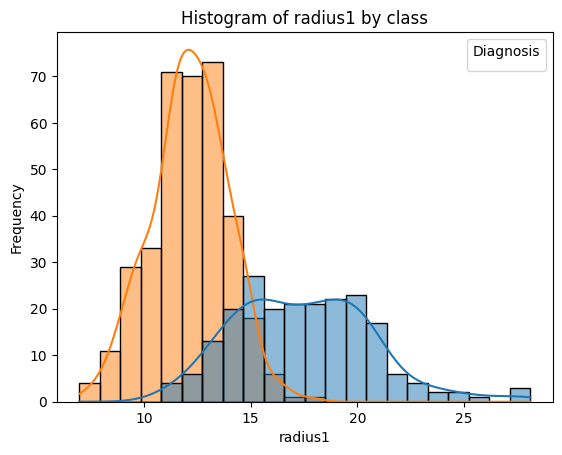

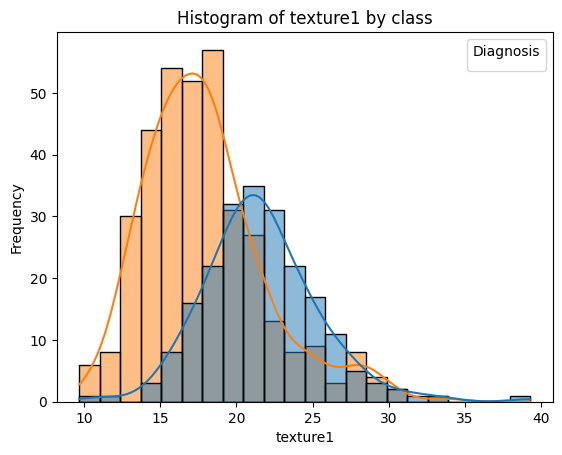

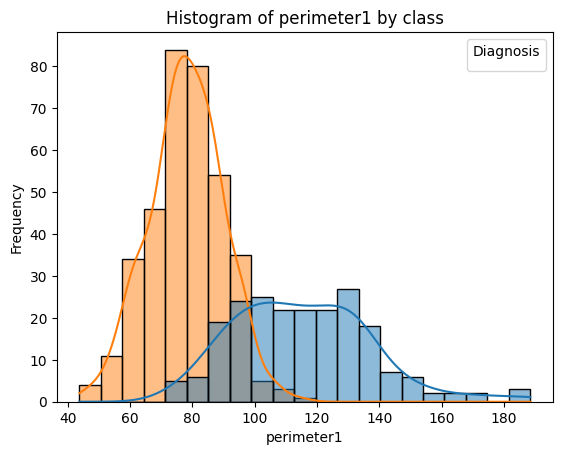

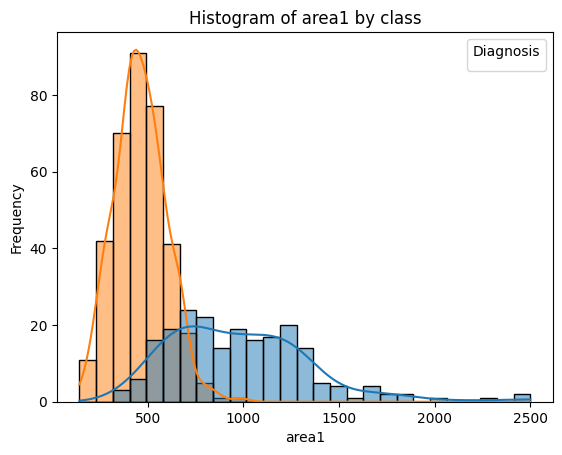

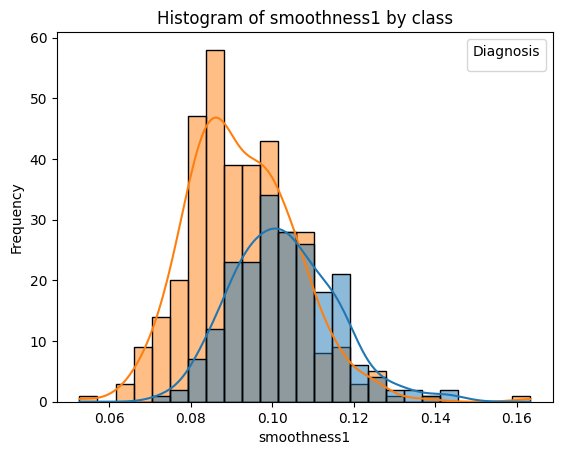

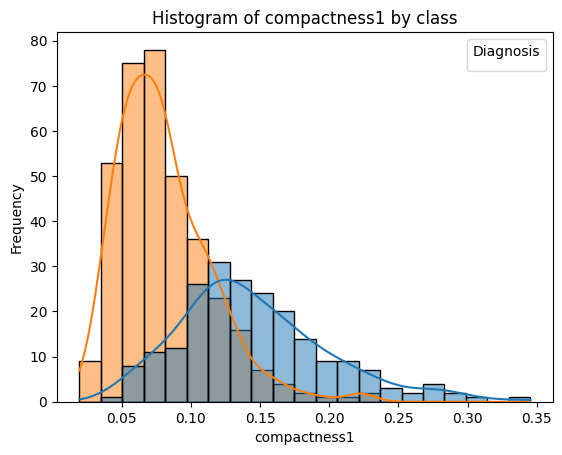

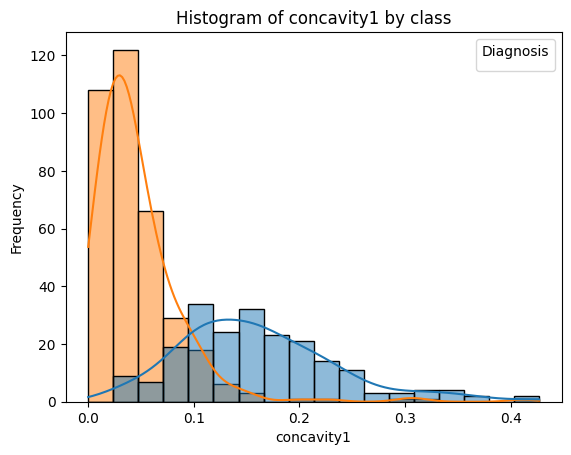

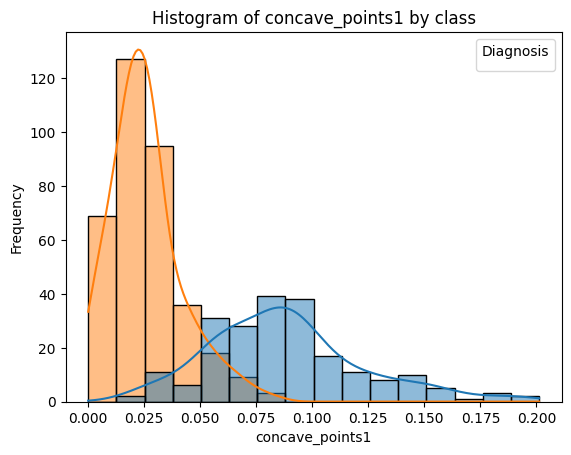

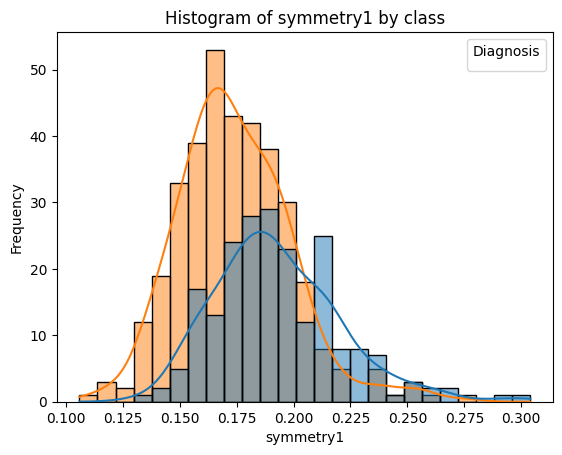

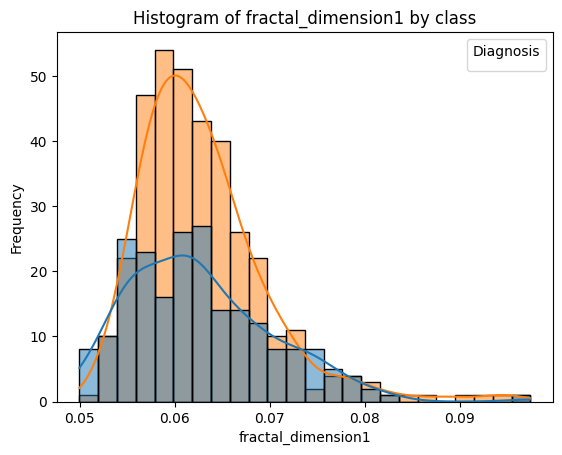

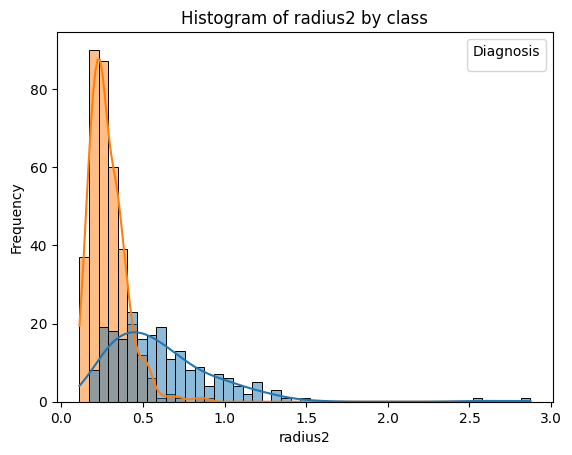

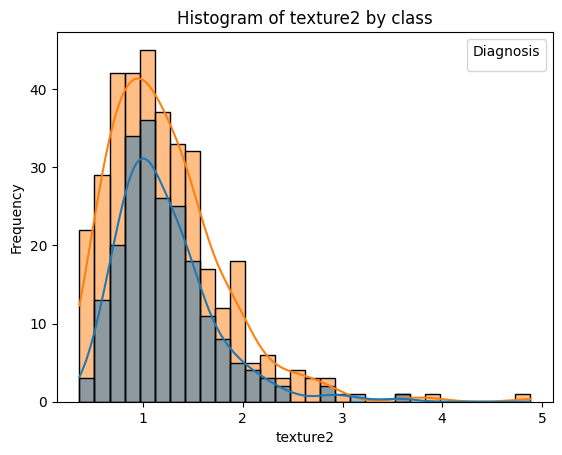

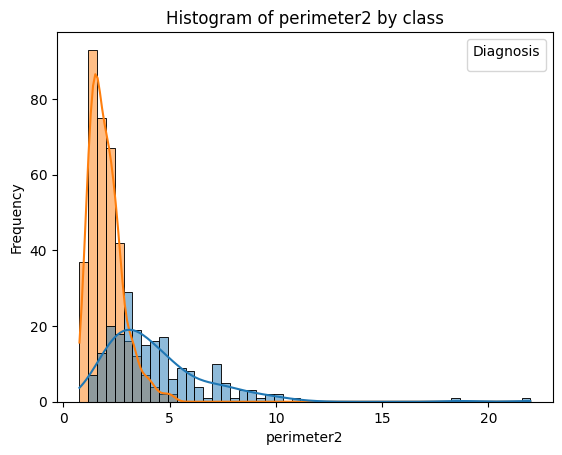

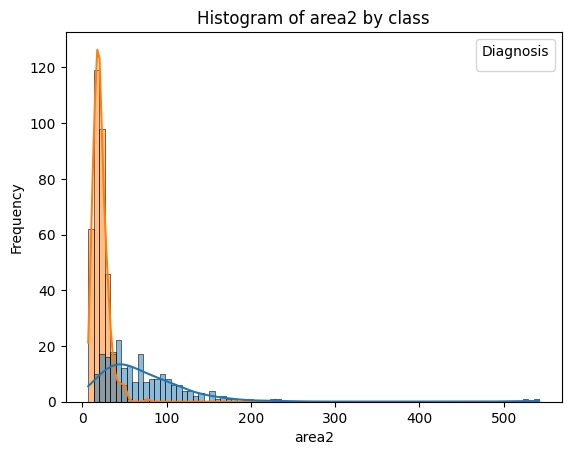

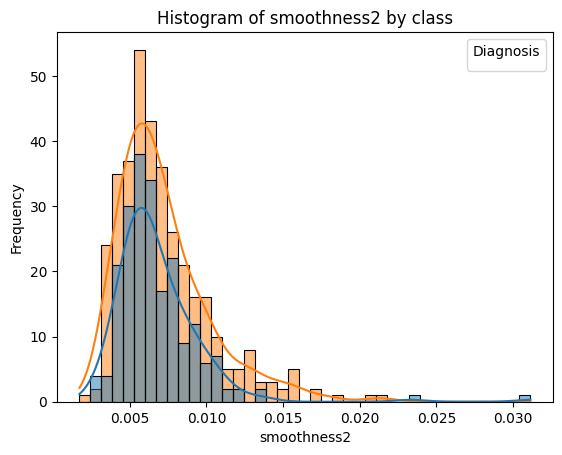

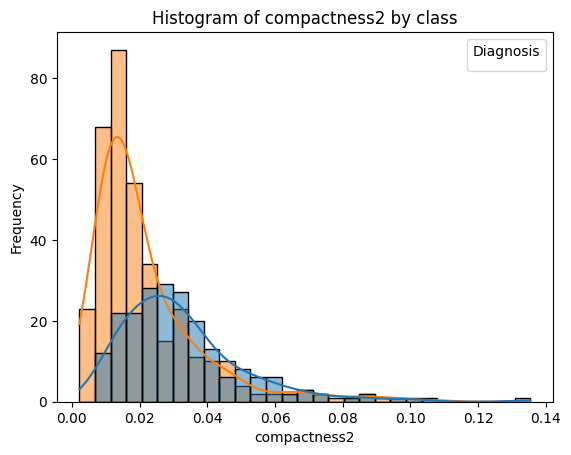

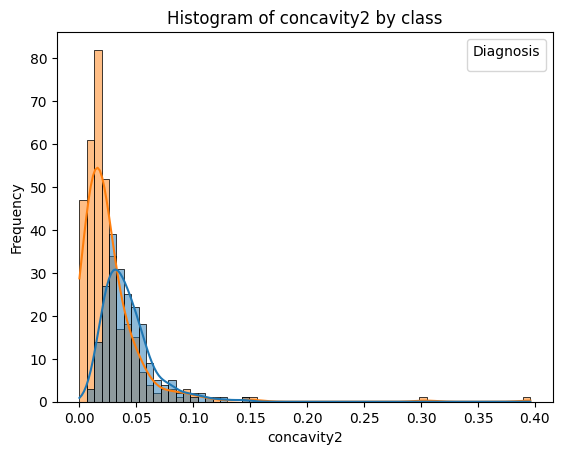

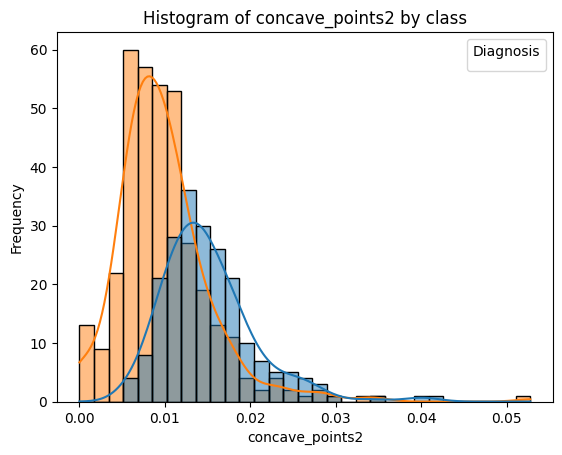

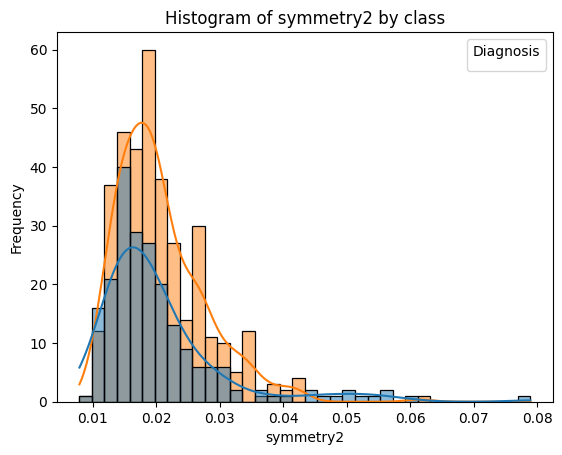

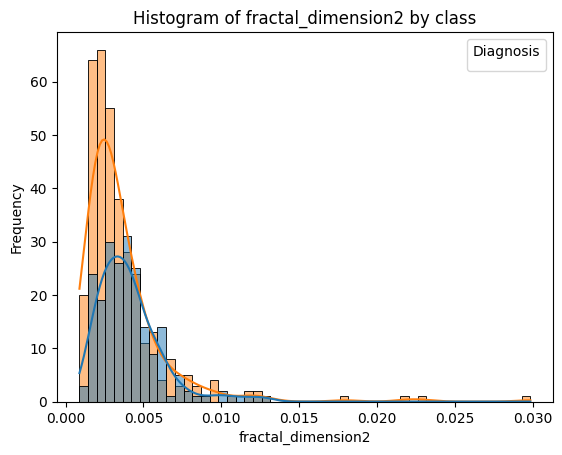

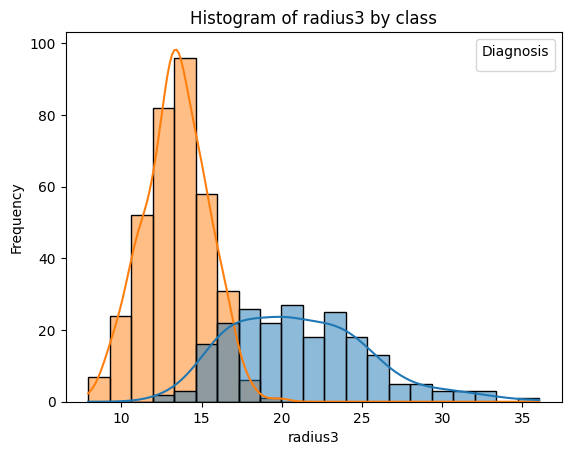

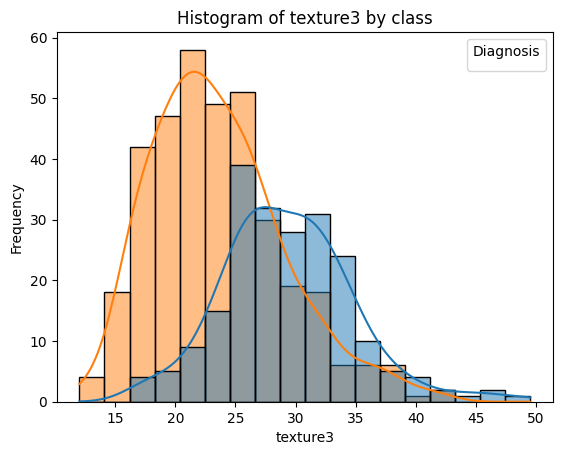

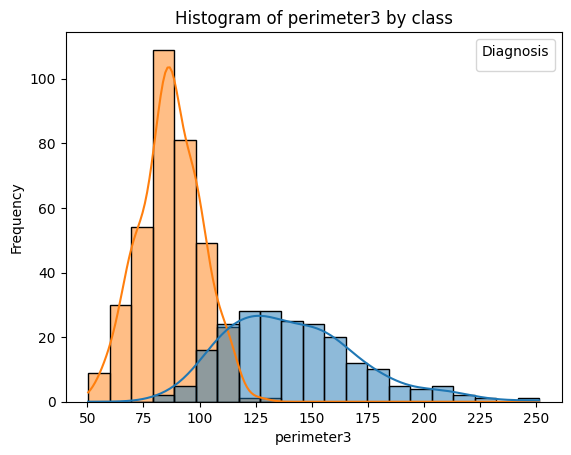

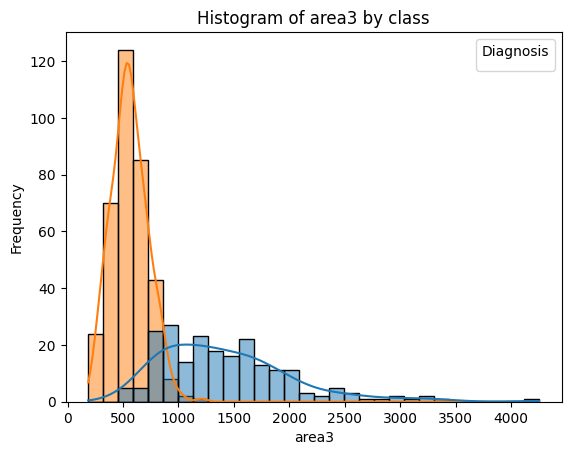

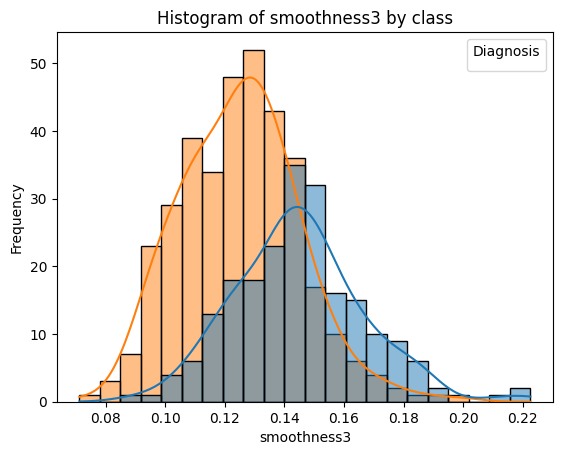

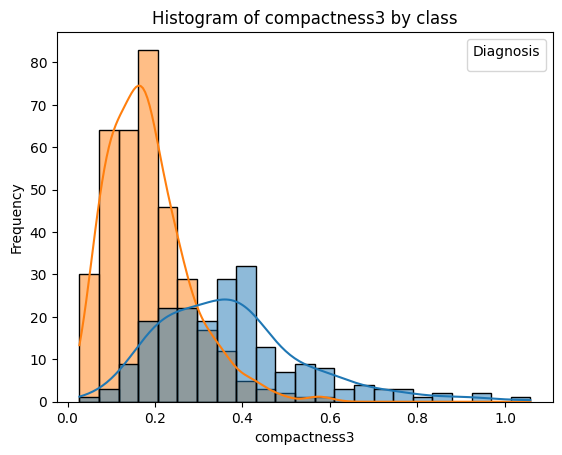

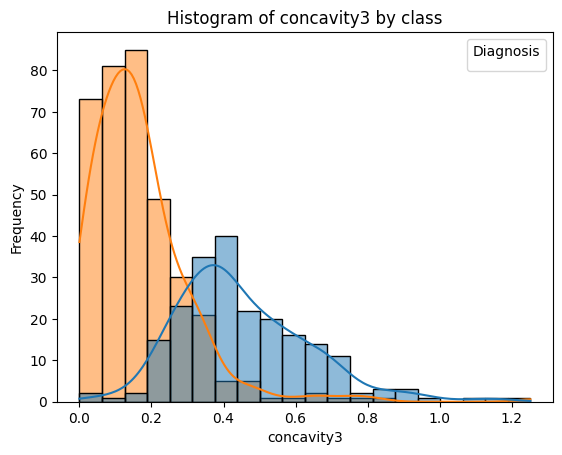

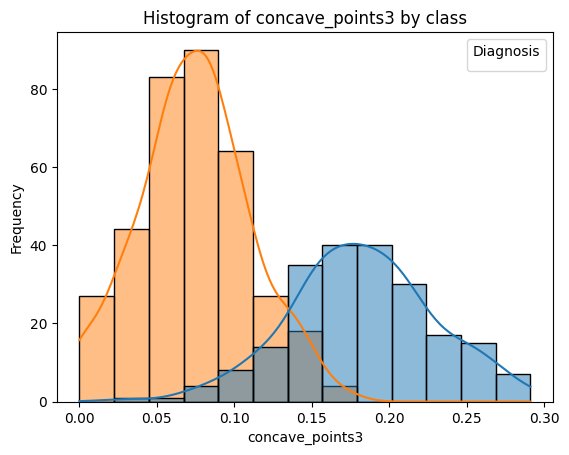

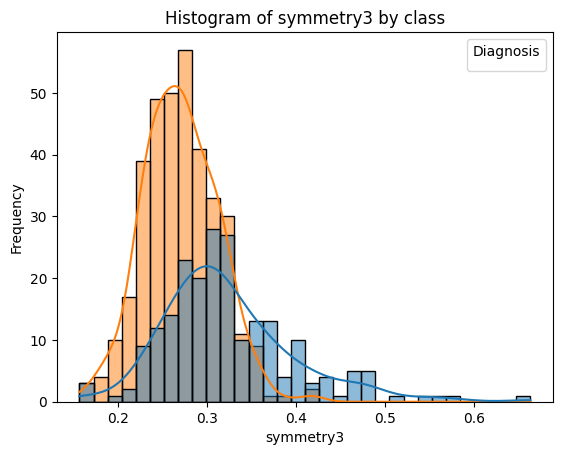

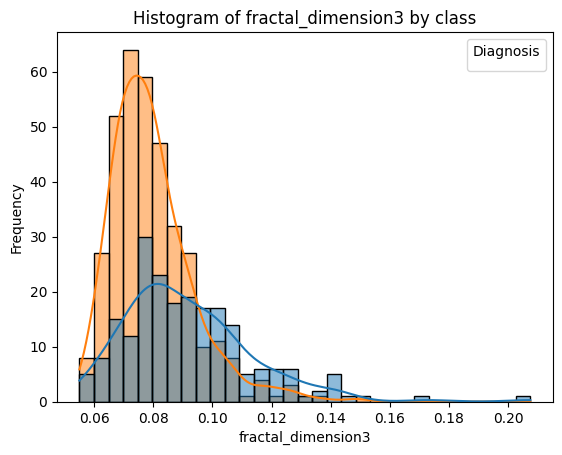

In [27]:

print(y.columns)
data = X.copy()
data['Diagnosis'] = y
target='Diagnosis'

for feature in feature_names:
    sns.histplot(data=data, x=feature, hue='Diagnosis', kde=True)
    plt.title(f'Histogram of {feature} by class')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title=target)
    plt.show()

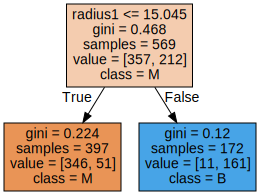

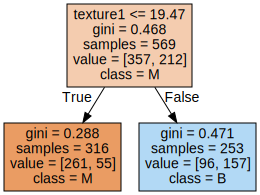

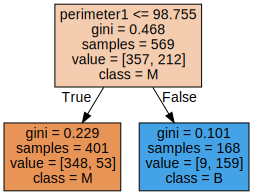

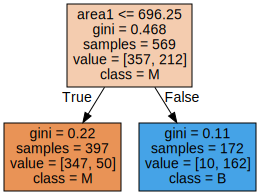

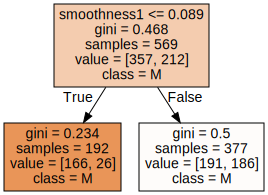

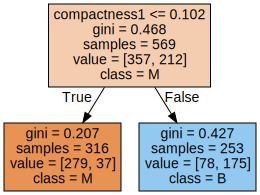

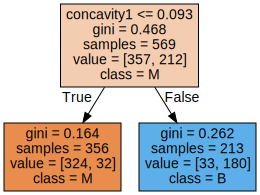

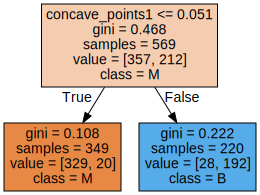

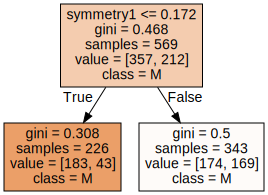

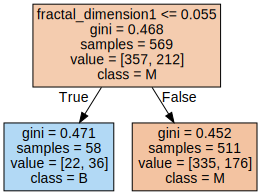

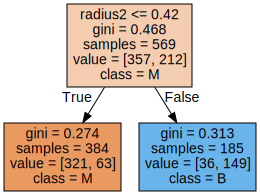

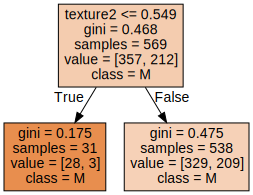

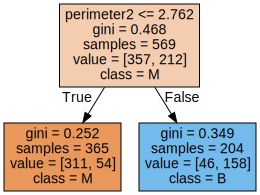

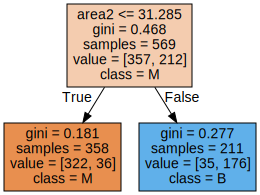

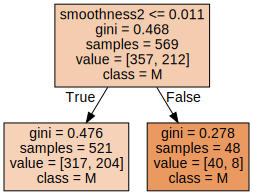

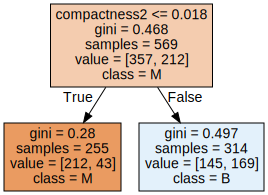

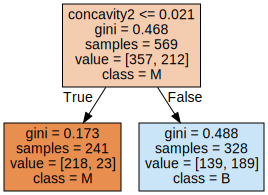

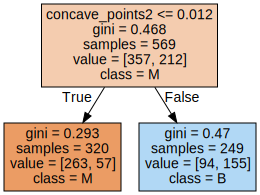

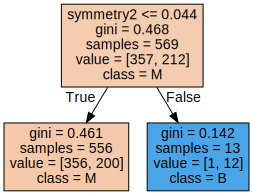

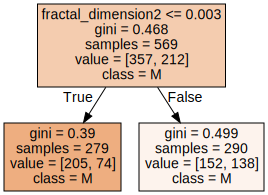

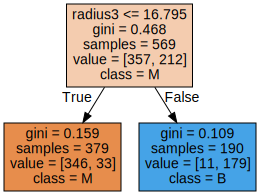

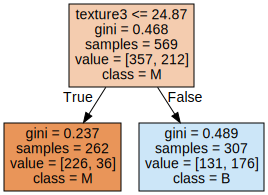

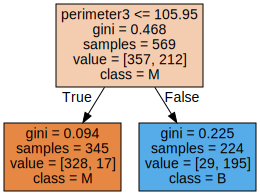

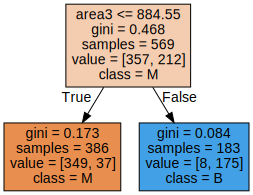

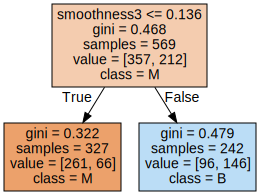

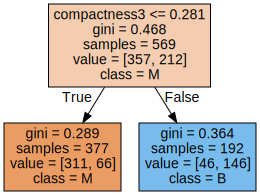

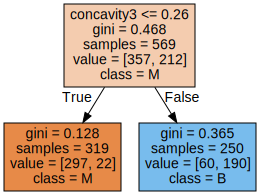

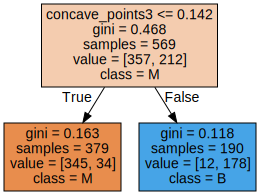

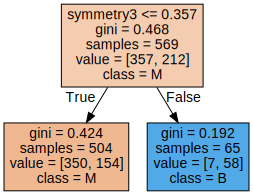

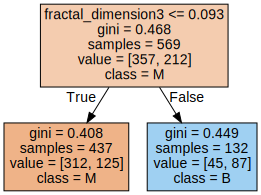

In [8]:


for feature in feature_names:

    treeclf = DecisionTreeClassifier(max_depth=1, random_state=1)
    X_feature = np.array(X[feature]).reshape(-1, 1)
    treeclf.fit(X_feature, y)

    dot = export_graphviz(treeclf, out_file=None, feature_names=[feature],
                          class_names=['M', 'B'], filled=True)
    # print(dot)

    graph = Source(dot)
    svg = SVG(graph.pipe(format='svg'))
    display(svg)


The decision tree algorithm, such as the one we used here, makes decisions at each node based on the attribute that results in the best split according to a certain criterion, typically the Gini impurity or information gain. At a given tree level, it's not necessary for all nodes to split on the same attribute.

This happens because the algorithm evaluates all available attributes at each node and selects the one that maximizes the chosen criterion. Different nodes may have different distributions of data, so the attribute that best separates the data at one node may not be the best choice for another node at the same level.